In [36]:
#importing required libraries and loading our data.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
df = pd.read_csv('creditcard.csv')

In [39]:
#gaining general info.

In [40]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
#according to dataset owners except the amount and time column, the v1,v2,v3,,,,vn 
#columns are created with pca to provide privacy.

In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [43]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [44]:
df['Amount'].max()

25691.16

In [45]:
df['Amount'].sort_values(ascending=False)

274771    25691.16
58465     19656.53
151296    18910.00
46841     12910.93
54018     11898.09
            ...   
242261        0.00
231211        0.00
207747        0.00
190081        0.00
8346          0.00
Name: Amount, Length: 284807, dtype: float64

In [46]:
#some plots.

<AxesSubplot:xlabel='Amount'>

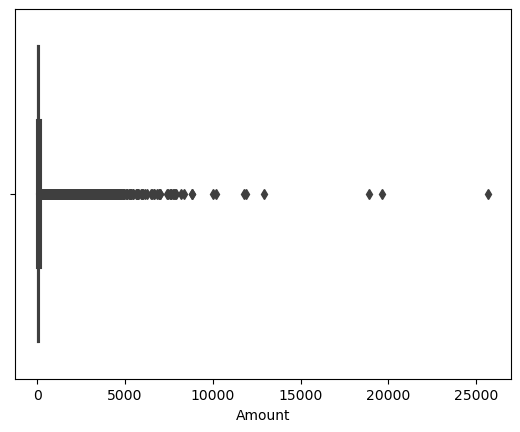

In [47]:
sns.boxplot(data=df, x='Amount')

In [48]:
df['Time'].head()

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Time, dtype: float64

In [49]:
df['Time'].max()

172792.0

<AxesSubplot:>

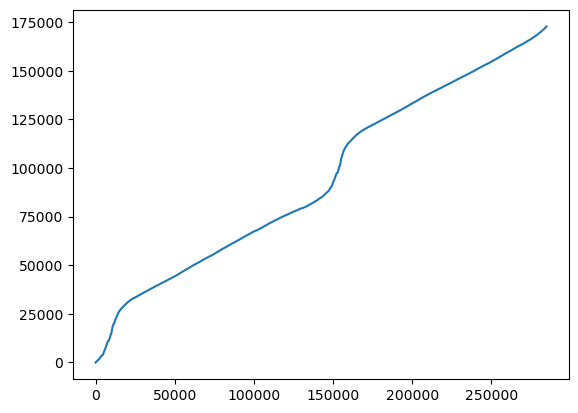

In [50]:
df['Time'].plot()

In [51]:
#The time column gives the transaction time distance from the first data in the dataset.
#It is aggregative. Instead of this we are creating new column that gives us the transaction time difference from 1 data before itself.

In [52]:
df['Change']  = df['Time'].pct_change()

In [53]:
#Dropping the time column

In [54]:
df.drop('Time', axis=1, inplace=True)

In [55]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Change
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,NaN
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,NaN
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,inf
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.0


In [56]:
df['Change'].head()

0    NaN
1    NaN
2    inf
3    0.0
4    1.0
Name: Change, dtype: float64

In [57]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Change    2
dtype: int64

In [58]:
#dropping infinite values

In [59]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [60]:
df.dropna(inplace=True)

In [61]:
#labeling our values as x as features y as labels.
#Dividing our values into training and test set. 

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X=df.drop('Class', axis=1)
y=df['Class']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
#scaling our data
#2 reminders --- 1. We are only scaling features, we don't need to scale our labels.
#                2. fit_transform for train set and transform for test set in order to prevent data leakage.

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc = StandardScaler()

In [68]:
X_train_scaled = sc.fit_transform(X_train)

In [69]:
X_test_scaled = sc.transform(X_test)

In [70]:
#Importing and training our model
#In this case we are choosing randomforestclassifier for this classification problem. (not fraud or fraud)

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rnd = RandomForestClassifier(n_estimators=500)

In [73]:
rnd.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [74]:
pred = rnd.predict(X_test)

In [75]:
#importing our evaluating metrics, which are confusion matrix and classification report.
#these metrics are for classification problems

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))
cm = confusion_matrix(pred, y_test)

[[93804    39]
 [    8   135]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93843
           1       0.78      0.94      0.85       143

    accuracy                           1.00     93986
   macro avg       0.89      0.97      0.93     93986
weighted avg       1.00      1.00      1.00     93986



<AxesSubplot:>

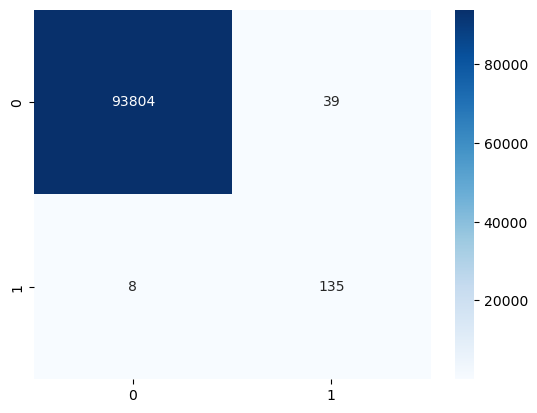

In [78]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [79]:
# for not fraud situation we have 1 precision 1 recall 1 f1 score which is normal and not a true success symbol, 
#we already have unbalanced dataset, most of the time there is no fraud.
#however also for fraud situations, we have 0.78 precision, 0.94 recall, 0.85 f1 score which is quite succesfull.

In [81]:
#total no fraud and fraud amounts in our predictions.

In [80]:
pred_df = pd.DataFrame(pred)

In [82]:
pred_df.value_counts()

0    93843
1      143
dtype: int64

In [ ]:
#In total we have 0.15% fraud

In [86]:
143/93986

0.0015215032026046431

In [93]:
pred_df[pred_df[0] == 1]

,0
28,1
49,1
296,1
362,1
1376,1
...,...
92728,1
92820,1
93734,1
93773,1
